In [1]:
import pandas as pd
from sqlalchemy import create_engine, text
from dotenv import load_dotenv
import os

load_dotenv()  # loads environment variables from .env file in your project root

# Database connection info - load from environment variables
MYSQL_USER = os.getenv('MYSQL_USER')
MYSQL_PASSWORD = os.getenv('MYSQL_PASSWORD')
MYSQL_HOST = os.getenv('MYSQL_HOST')
MYSQL_PORT = os.getenv('MYSQL_PORT')
MYSQL_DATABASE = os.getenv('MYSQL_DATABASE')
TABLE_NAME = '311_complaints_2'

# Create engine
engine = create_engine(f'mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DATABASE}')

# Load sample data using a proper SQL text object
with engine.connect() as connection:
    df = pd.read_sql(text(f"SELECT * FROM {TABLE_NAME}"), connection)

df.tail()


,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,...,computed_region_sbqj_enih,computed_region_7mpf_4k6g,resolution_action_updated_date,resolution_description,closed_date,bridge_highway_name,bridge_highway_segment,facility_type,bridge_highway_direction,road_ramp
963991,60988313,2024-04-20 12:08:15,HPD,Department of Housing Preservation and Develop...,GENERAL,MAILBOX,RESIDENTIAL BUILDING,10452,40 FEATHERBED LANE,FEATHERBED LANE,...,None,None,2024-04-26,The Department of Housing Preservation and Dev...,2024-04-26 19:50:11,None,None,None,None,None
963992,61320392,2024-02-14 08:22:25,DOB,Department of Buildings,General Construction/Plumbing,Building Shaking/Vibrating/Structural Stability,None,11210,3324 AVENUE M,AVENUE M,...,None,None,2024-05-31,The Department of Buildings investigated this ...,2024-05-31 00:00:00,None,None,N/A,None,None
963993,63305582,2024-04-19 21:04:03,DOB,Department of Buildings,General Construction/Plumbing,Building Shaking/Vibrating/Structural Stability,None,10467,3160 DECATUR AVENUE,DECATUR AVENUE,...,None,None,2024-12-05,The Department of Buildings investigated this ...,2024-12-05 00:00:00,None,None,N/A,None,None
963994,63680217,2024-04-15 13:01:34,DOB,Department of Buildings,General Construction/Plumbing,Building Shaking/Vibrating/Structural Stability,None,11221,796 LEXINGTON AVENUE,LEXINGTON AVENUE,...,None,None,2025-01-08,The Department of Buildings investigated this ...,2025-01-08 00:00:00,None,None,N/A,None,None
963995,63692878,2024-03-19 09:26:18,DOB,Department of Buildings,General Construction/Plumbing,Building Shaking/Vibrating/Structural Stability,None,10312,39 STRAWBERRY LANE,STRAWBERRY LANE,...,None,None,2025-01-09,The Department of Buildings investigated this ...,2025-01-09 00:00:00,None,None,N/A,None,None


In [2]:
df = df[df['agency'] == 'NYPD']
df.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,...,computed_region_sbqj_enih,computed_region_7mpf_4k6g,resolution_action_updated_date,resolution_description,closed_date,bridge_highway_name,bridge_highway_segment,facility_type,bridge_highway_direction,road_ramp
0,59886871,2024-01-01 00:04:14,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10468,2535 GRAND AVENUE,GRAND AVENUE,...,None,None,2024-01-01 01:00:15,The Police Department issued a summons in resp...,2024-01-01 01:00:13,None,None,None,None,None
1,59886906,2024-01-01 00:59:23,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11373,81-09 41 AVENUE,41 AVENUE,...,None,None,2024-01-01 01:27:15,The Police Department responded to the complai...,2024-01-01 01:27:12,None,None,None,None,None
2,59886911,2024-01-01 00:52:54,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11224,2928 MARSHA RAPAPORT WAY,MARSHA RAPAPORT WAY,...,None,None,2024-01-01 01:09:23,The Police Department responded to the complai...,2024-01-01 01:09:19,None,None,None,None,None
3,59887007,2024-01-01 00:44:31,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11436,144-28 LINDEN BOULEVARD,LINDEN BOULEVARD,...,None,None,2024-01-01 01:03:14,The Police Department responded to the complai...,2024-01-01 01:03:11,None,None,None,None,None
4,59887011,2024-01-01 00:41:16,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11239,598 SCHROEDERS AVENUE,SCHROEDERS AVENUE,...,None,None,2024-01-01 01:17:29,The Police Department responded to the complai...,2024-01-01 01:17:24,None,None,None,None,None


In [3]:
#Data types and missing values summary from the sample (done in pandas)
print("Data types and missing values:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 388894 entries, 0 to 963407
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   unique_key                      388894 non-null  object        
 1   created_date                    388894 non-null  datetime64[ns]
 2   agency                          388894 non-null  object        
 3   agency_name                     388894 non-null  object        
 4   complaint_type                  388894 non-null  object        
 5   descriptor                      388894 non-null  object        
 6   location_type                   388894 non-null  object        
 7   incident_zip                    386410 non-null  object        
 8   incident_address                386707 non-null  object        
 9   street_name                     386706 non-null  object        
 10  cross_street_1                

In [4]:
# Drop columns with more than 25000 missing values
threshold = 25000
cols_to_drop = df.columns[df.isnull().sum() > threshold]
df = df.drop(columns=cols_to_drop)

# Optional: print what was dropped
print(f"Dropped {len(cols_to_drop)} columns:\n{cols_to_drop.tolist()}")


Dropped 16 columns:
['intersection_street_1', 'intersection_street_2', 'landmark', 'bbl', 'vehicle_type', 'computed_region_efsh_h5xi', 'computed_region_f5dn_yrer', 'computed_region_yeji_bk3q', 'computed_region_92fq_4b7q', 'computed_region_sbqj_enih', 'computed_region_7mpf_4k6g', 'bridge_highway_name', 'bridge_highway_segment', 'facility_type', 'bridge_highway_direction', 'road_ramp']


In [5]:
df = df.dropna()

In [6]:
# 2. Data types and missing values summary from the sample (done in pandas)
print("Data types and missing values:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 368307 entries, 0 to 963407
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   unique_key                      368307 non-null  object        
 1   created_date                    368307 non-null  datetime64[ns]
 2   agency                          368307 non-null  object        
 3   agency_name                     368307 non-null  object        
 4   complaint_type                  368307 non-null  object        
 5   descriptor                      368307 non-null  object        
 6   location_type                   368307 non-null  object        
 7   incident_zip                    368307 non-null  object        
 8   incident_address                368307 non-null  object        
 9   street_name                     368307 non-null  object        
 10  cross_street_1                

In [7]:
print(df[['latitude', 'longitude']].describe())
print(df[df['latitude'].notnull() & ((df['latitude'] < -90) | (df['latitude'] > 90))])
print(df[df['longitude'].notnull() & ((df['longitude'] < -180) | (df['longitude'] > 180))])


            latitude      longitude
count  368307.000000  368307.000000
mean       40.728807     -73.919993
std         0.082032       0.073479
min        40.499500     -74.253200
25%        40.671500     -73.969000
50%        40.722200     -73.924700
75%        40.791000     -73.872200
max        40.912900     -73.700700
Empty DataFrame
Columns: [unique_key, created_date, agency, agency_name, complaint_type, descriptor, location_type, incident_zip, incident_address, street_name, cross_street_1, cross_street_2, address_type, city, status, community_board, borough, x_coordinate_state_plane, y_coordinate_state_plane, open_data_channel_type, park_facility_name, park_borough, latitude, longitude, location, resolution_action_updated_date, resolution_description, closed_date]
Index: []

[0 rows x 28 columns]
Empty DataFrame
Columns: [unique_key, created_date, agency, agency_name, complaint_type, descriptor, location_type, incident_zip, incident_address, street_name, cross_street_1, cross_str

In [8]:
df_valid = df[
    (df['latitude'] >= -90) & (df['latitude'] <= 90) &
    (df['longitude'] >= -180) & (df['longitude'] <= 180)
].copy()


In [9]:
df = df_valid

In [10]:
# This section prepares the raw complaint data for analysis:
# 
# 1. Data Cleaning:
#    - Ensures only valid geographic coordinates are kept (latitude between -90 and 90, longitude between -180 and 180).
#    - Converts the 'created_date' column to datetime format and extracts just the date part for grouping.
#
# 2. Spatial Indexing:
#    - Uses the H3 spatial indexing system at resolution 7 to assign each complaint to a specific hexagonal grid cell (h3_index) based on its latitude and longitude.
#
# 3. Aggregation:
#    - Groups the data by date and H3 hex cell, counting how many complaints occurred in each hex on each date.
#    - The result ('agg') is a summarized dataset showing complaint counts per hex per day, which is easier to analyze for spatial-temporal patterns.


In [ ]:
'''
# -------------------------------
# 1. Load & Clean Data
# -------------------------------
# Make sure your dataframe is called `df` and includes 'latitude', 'longitude', 'created_date', and 'borough'

# Filter valid coordinates
df = df[
    (df['latitude'].between(-90, 90)) &
    (df['longitude'].between(-180, 180))
].copy()

# Convert created_date to datetime and extract date
df['created_date'] = pd.to_datetime(df['created_date'])
df['date'] = df['created_date'].dt.date

# -------------------------------
# 2. Assign H3 Hexes
# -------------------------------
resolution = 7
df['h3_index'] = df.apply(lambda row: h3.latlng_to_cell(row['latitude'], row['longitude'], resolution), axis=1)

# -------------------------------
# 3. Aggregate by H3 and Date
# -------------------------------
agg = df.groupby(['date', 'h3_index']).size().reset_index(name='complaint_count')

'''

In [19]:
# ------------------------------------------------------
# 📌 Baseline Logistic Regression Model - Commentary
# ------------------------------------------------------

# ✅ This model is our baseline for hotspot prediction:
# - Uses logistic regression (simple linear classifier).
# - Features: 3-day rolling average of complaint count (lagged),
#   day of week, weekend indicator, and month.
# - Hotspots defined as complaint counts in the top 10% per day.
# - Temporal train/test split (80% train, 20% test by date).
# - Outputs classification report and ROC AUC.

# 🔍 Compared to Enhanced Logistic Regression:
# - Same model class but with basic features only.
# - Lacks additional engineered features (e.g., lagged counts, std dev).
# - Useful as a benchmark to measure added value of more complex features.

# 🔍 Compared to Random Forest Model:
# - Linear vs. non-linear (Random Forest captures feature interactions).
# - Less powerful on imbalanced or complex data.
# - Faster and more interpretable, but generally lower predictive accuracy.
# - Random Forest includes richer features (lag1, 7-day avg, std, etc.).

# 📊 Summary:
# | Model                  | Complexity | Interpretability | Predictive Power |
# |------------------------|------------|------------------|------------------|
# | Baseline Logistic Reg  | Low        | High             | 🔸 Basic         |
# | Enhanced Logistic Reg  | Low        | High             | 🔹 Moderate      |
# | Random Forest          | High       | Medium           | 🔷 High          |

# 🧠 This baseline model sets a reference point to evaluate
# the impact of feature engineering and non-linear models.


In [20]:
import pandas as pd
import h3
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# -------------------------------
# 1. Load & Clean Data
# -------------------------------
# Make sure your dataframe is called `df` and includes 'latitude', 'longitude', 'created_date', and 'borough'

# Filter valid coordinates
df = df[
    (df['latitude'].between(-90, 90)) &
    (df['longitude'].between(-180, 180))
].copy()

# Convert created_date to datetime and extract date
df['created_date'] = pd.to_datetime(df['created_date'])
df['date'] = df['created_date'].dt.date

# -------------------------------
# 2. Assign H3 Hexes
# -------------------------------
resolution = 7
df['h3_index'] = df.apply(lambda row: h3.latlng_to_cell(row['latitude'], row['longitude'], resolution), axis=1)

# -------------------------------
# 3. Aggregate by H3 and Date
# -------------------------------
agg = df.groupby(['date', 'h3_index']).size().reset_index(name='complaint_count')

# Add mode of borough per hex-date (for filtering or color mapping later)
borough_mode = df.groupby(['date', 'h3_index'])['borough'].agg(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()
agg = agg.merge(borough_mode, on=['date', 'h3_index'], how='left')

# -------------------------------
# 4. Label Hotspots (90th percentile)
# -------------------------------
threshold = agg['complaint_count'].quantile(0.90)
agg['hotspot'] = (agg['complaint_count'] >= threshold).astype(int)

# -------------------------------
# 5. Feature Engineering
# -------------------------------
agg['date'] = pd.to_datetime(agg['date'])
agg['day_of_week'] = agg['date'].dt.dayofweek
agg['is_weekend'] = agg['day_of_week'].isin([5, 6]).astype(int)
agg['month'] = agg['date'].dt.month

# Sort and calculate rolling average
agg = agg.sort_values(['h3_index', 'date'])
agg['complaint_count_3d_avg'] = agg.groupby('h3_index')['complaint_count'] \
                                   .transform(lambda x: x.shift(1).rolling(3).mean()) \
                                   .fillna(0)

# -------------------------------
# 6. Train/Test Split
# -------------------------------
features = ['complaint_count_3d_avg', 'day_of_week', 'is_weekend', 'month']
target = 'hotspot'

# Train on 80% oldest dates, test on 20% recent
split_date = agg['date'].quantile(0.8)
train = agg[agg['date'] <= split_date]
test = agg[agg['date'] > split_date]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# -------------------------------
# 7. Train Model
# -------------------------------
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# -------------------------------
# 8. Predict & Evaluate
# -------------------------------
agg['predicted_hotspot'] = model.predict(agg[features])
agg['hotspot_probability'] = model.predict_proba(agg[features])[:, 1]

print("Model Evaluation on Test Set:")
print(classification_report(y_test, model.predict(X_test)))
print(f"ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.3f}")

# -------------------------------
# 9. Add H3 Centroids for Tableau
# -------------------------------
agg['lat'] = agg['h3_index'].apply(lambda h: h3.cell_to_latlng(h)[0])
agg['lng'] = agg['h3_index'].apply(lambda h: h3.cell_to_latlng(h)[1])

# -------------------------------
# 10. Export to CSV for Tableau
# -------------------------------
agg.to_csv("/Users/danielbrown/Desktop/complaint_hotspot_predictions.csv", index=False)
print("✅ Output saved to '/Users/danielbrown/Desktop/complaint_hotspot_predictions.csv'")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Model Evaluation on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3023
           1       0.77      0.51      0.61       413

    accuracy                           0.92      3436
   macro avg       0.85      0.74      0.79      3436
weighted avg       0.92      0.92      0.92      3436

ROC AUC Score: 0.951
✅ Output saved to '/Users/danielbrown/Desktop/complaint_hotspot_predictions.csv'


In [21]:
# ------------------------------------------------------
# 🧪 Baseline Model - Evaluation Summary
# ------------------------------------------------------

# ✅ Overall Accuracy: 92%
# - The model correctly classifies most cases, but accuracy alone can be misleading
#   due to class imbalance (many more non-hotspots than hotspots).

# 🔍 Class 0 (Non-Hotspots):
# - Precision: 0.94 → When the model predicts non-hotspot, it's correct 94% of the time.
# - Recall: 0.98 → It captures nearly all actual non-hotspots (very low false negatives).
# - F1-score: 0.96 → High balance between precision and recall.

# 🔍 Class 1 (Hotspots):
# - Precision: 0.77 → 77% of predicted hotspots are correct.
# - Recall: 0.51 → The model only captures about half of true hotspots.
# - F1-score: 0.61 → Indicates room for improvement in hotspot detection.

# 📈 ROC AUC: 0.951
# - Strong discrimination ability overall — the model ranks true hotspots higher
#   than non-hotspots with high consistency, despite recall challenges.

# 🧠 Takeaway:
# - Strong baseline performance on majority class (non-hotspots).
# - Struggles with recall on minority class (hotspots) — typical for imbalanced data.
# - Future models should focus on boosting recall for hotspots (e.g., better features,
#   handling imbalance, or using more flexible models like Random Forests).


In [22]:
# This notebook performs hotspot detection on geolocated complaint data using spatial (H3 indexing) and temporal features.
# Steps:
# 1. Load and clean the data, ensuring valid coordinates and parsing dates.
# 2. Assign H3 hexagons (resolution 7) to each complaint based on latitude and longitude.
# 3. Aggregate complaint counts per hex-date and extract the mode borough for each group.
# 4. Label the top 10% complaint counts as 'hotspots'.
# 5. Engineer temporal features (weekday, weekend, monthly, and rolling stats).
# 6. Split the data chronologically into training and test sets (80/20).
# 7. Train a logistic regression model to predict hotspot presence.
# 8. Evaluate model performance with classification metrics and ROC AUC.
# 9. Add H3 centroid coordinates for spatial visualization in Tableau.
# 10. Export the final dataframe to CSV for Tableau dashboarding.


In [23]:
import pandas as pd
import h3
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# -------------------------------
# 1. Load & Clean Data
# -------------------------------
# Make sure your dataframe is called `df` and includes 'latitude', 'longitude', 'created_date', and 'borough'

# Filter valid coordinates
df = df[
    (df['latitude'].between(-90, 90)) &
    (df['longitude'].between(-180, 180))
].copy()

# Convert created_date to datetime and extract date
df['created_date'] = pd.to_datetime(df['created_date'])
df['date'] = df['created_date'].dt.date

# -------------------------------
# 2. Assign H3 Hexes
# -------------------------------
resolution = 7
df['h3_index'] = df.apply(lambda row: h3.latlng_to_cell(row['latitude'], row['longitude'], resolution), axis=1)

# -------------------------------
# 3. Aggregate by H3 and Date
# -------------------------------
agg = df.groupby(['date', 'h3_index']).size().reset_index(name='complaint_count')

# Add mode of borough per hex-date (for filtering or color mapping later)
borough_mode = df.groupby(['date', 'h3_index'])['borough'].agg(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()
agg = agg.merge(borough_mode, on=['date', 'h3_index'], how='left')

# -------------------------------
# 4. Label Hotspots (90th percentile)
# -------------------------------
threshold = agg['complaint_count'].quantile(0.90)
agg['hotspot'] = (agg['complaint_count'] >= threshold).astype(int)

# -------------------------------
# 5. Feature Engineering (Extended)
# -------------------------------
agg['date'] = pd.to_datetime(agg['date'])
agg['day_of_week'] = agg['date'].dt.dayofweek
agg['is_weekend'] = agg['day_of_week'].isin([5, 6]).astype(int)
agg['month'] = agg['date'].dt.month

# Sort values
agg = agg.sort_values(['h3_index', 'date'])

# Rolling features
grouped = agg.groupby('h3_index')['complaint_count']
agg['complaint_count_lag1'] = grouped.shift(1).fillna(0)
agg['complaint_count_3d_avg'] = grouped.shift(1).rolling(3).mean().fillna(0)
agg['complaint_count_7d_avg'] = grouped.shift(1).rolling(7).mean().fillna(0)
agg['complaint_count_7d_std'] = grouped.shift(1).rolling(7).std().fillna(0)

# -------------------------------
# 6. Train/Test Split
# -------------------------------
features = [
    'complaint_count_lag1',
    'complaint_count_3d_avg',
    'complaint_count_7d_avg',
    'complaint_count_7d_std',
    'day_of_week',
    'is_weekend',
    'month'
]
target = 'hotspot'

# Train on 80% oldest dates, test on 20% recent
split_date = agg['date'].quantile(0.8)
train = agg[agg['date'] <= split_date]
test = agg[agg['date'] > split_date]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# -------------------------------
# 7. Train Model
# -------------------------------
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# -------------------------------
# 8. Predict & Evaluate
# -------------------------------
agg['predicted_hotspot'] = model.predict(agg[features])
agg['hotspot_probability'] = model.predict_proba(agg[features])[:, 1]

print("Model Evaluation on Test Set:")
print(classification_report(y_test, model.predict(X_test)))
print(f"ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.3f}")

# -------------------------------
# 9. Add H3 Centroids for Tableau
# -------------------------------
agg['lat'] = agg['h3_index'].apply(lambda h: h3.cell_to_latlng(h)[0])
agg['lng'] = agg['h3_index'].apply(lambda h: h3.cell_to_latlng(h)[1])

# -------------------------------
# 10. Export to CSV for Tableau
# -------------------------------
agg.to_csv("/Users/danielbrown/Desktop/complaint_hotspot_predictions_1.csv", index=False)
print("✅ Output saved to '/Users/danielbrown/Desktop/complaint_hotspot_predictions_1.csv'")


Model Evaluation on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3023
           1       0.82      0.54      0.65       413

    accuracy                           0.93      3436
   macro avg       0.88      0.76      0.81      3436
weighted avg       0.93      0.93      0.92      3436

ROC AUC Score: 0.959
✅ Output saved to '/Users/danielbrown/Desktop/complaint_hotspot_predictions_1.csv'


In [24]:
# ------------------------------------------------------
# 🔧 Logistic Regression w/ More Feature Engineering - Evaluation Summary
# ------------------------------------------------------

# ✅ Overall Accuracy: 93%
# - Slight improvement over the baseline (92%), showing marginally better overall performance.

# 🔍 Class 0 (Non-Hotspots):
# - Precision: 0.94 | Recall: 0.98 | F1-score: 0.96
# - Very similar to baseline — still strong performance on the majority class.

# 🔍 Class 1 (Hotspots):
# - Precision: 0.82 → Improved from 0.77 in baseline.
# - Recall: 0.54 → Slightly better than baseline (0.51), but still underwhelming.
# - F1-score: 0.65 → Notable gain over baseline (0.61), indicating better hotspot detection.

# 📈 ROC AUC: 0.959
# - Stronger than baseline (0.951), indicating improved ability to rank hotspot likelihoods.

# 🧠 Takeaway:
# - This model demonstrates **meaningful gains** from additional feature engineering.
# - Precision and F1-score for hotspots improved, suggesting better distinction of true hotspots.
# - Recall remains a challenge, but progress shows we're moving in the right direction.
# - Next steps might include:
#     • Addressing class imbalance (e.g., oversampling, SMOTE, class weights).
#     • Exploring more flexible models (e.g., Random Forests, Gradient Boosting).
#     • Further refining features related to spatiotemporal trends or complaint patterns.


In [25]:
# 🔍 Complaint Hotspot Prediction with Random Forest
# --------------------------------------------------
# This pipeline processes geolocated complaint data to identify urban complaint hotspots:
# 1. Loads and cleans raw complaint data, filtering invalid coordinates and formatting dates.
# 2. Assigns each complaint to an H3 spatial hexagon (resolution 7).
# 3. Aggregates daily complaints per H3 cell and tags hotspots as those in the top 10% by count.
# 4. Engineers temporal features (lags, rolling averages/stds, weekday info) for modeling.
# 5. Splits data into train/test based on date quantile (80/20) to preserve time order.
# 6. Trains a Random Forest classifier to predict whether an H3 cell will be a hotspot.
# 7. Evaluates performance using classification metrics and ROC AUC.
# 8. Visualizes feature importances.
# 9. Adds latitude/longitude centroids for Tableau mapping.
# 10. Exports final dataset for visualization or deployment.


Random Forest Model Evaluation on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3023
           1       0.78      0.63      0.70       413

    accuracy                           0.93      3436
   macro avg       0.86      0.80      0.83      3436
weighted avg       0.93      0.93      0.93      3436

ROC AUC Score: 0.960


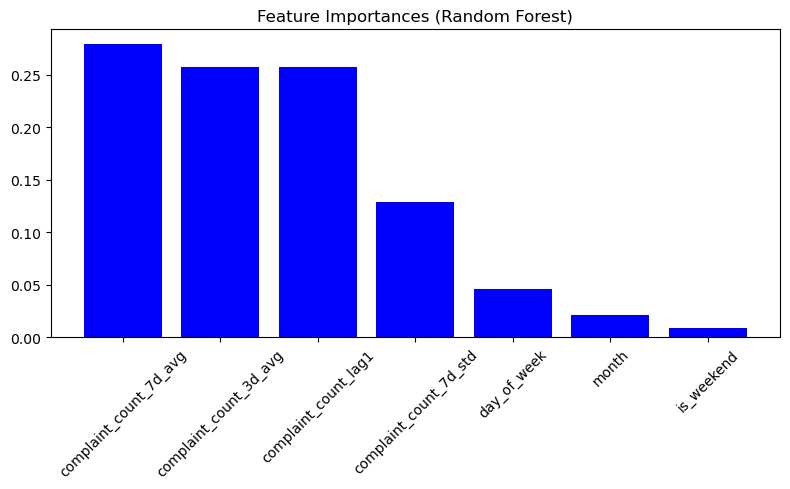

✅ Output saved to '/Users/danielbrown/Desktop/complaint_hotspot_predictions_rf.csv'


In [26]:
import pandas as pd
import h3
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

# -------------------------------
# 1. Load & Clean Data
# -------------------------------
# Assuming your original dataframe is called df and already loaded, including required columns

# Filter valid coordinates
df = df[
    (df['latitude'].between(-90, 90)) &
    (df['longitude'].between(-180, 180))
].copy()

# Convert created_date to datetime and extract date
df['created_date'] = pd.to_datetime(df['created_date'])
df['date'] = df['created_date'].dt.date

# -------------------------------
# 2. Assign H3 Hexes
# -------------------------------
resolution = 7
df['h3_index'] = df.apply(lambda row: h3.latlng_to_cell(row['latitude'], row['longitude'], resolution), axis=1)

# -------------------------------
# 3. Aggregate by H3 and Date
# -------------------------------
agg = df.groupby(['date', 'h3_index']).size().reset_index(name='complaint_count')

# Add mode of borough per hex-date (optional, useful for later color mapping/filtering)
borough_mode = df.groupby(['date', 'h3_index'])['borough'].agg(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()
agg = agg.merge(borough_mode, on=['date', 'h3_index'], how='left')

# -------------------------------
# 4. Label Hotspots (90th percentile)
# -------------------------------
threshold = agg['complaint_count'].quantile(0.90)
agg['hotspot'] = (agg['complaint_count'] >= threshold).astype(int)

# -------------------------------
# 5. Feature Engineering
# -------------------------------
agg['date'] = pd.to_datetime(agg['date'])
agg['day_of_week'] = agg['date'].dt.dayofweek
agg['is_weekend'] = agg['day_of_week'].isin([5, 6]).astype(int)
agg['month'] = agg['date'].dt.month

agg = agg.sort_values(['h3_index', 'date'])

# Lag 1-day complaint count
agg['complaint_count_lag1'] = agg.groupby('h3_index')['complaint_count'].shift(1).fillna(0)

# Rolling averages and std dev for 3-day and 7-day windows (excluding current day)
agg['complaint_count_3d_avg'] = agg.groupby('h3_index')['complaint_count'] \
                                   .transform(lambda x: x.shift(1).rolling(3).mean()).fillna(0)

agg['complaint_count_7d_avg'] = agg.groupby('h3_index')['complaint_count'] \
                                   .transform(lambda x: x.shift(1).rolling(7).mean()).fillna(0)

agg['complaint_count_7d_std'] = agg.groupby('h3_index')['complaint_count'] \
                                   .transform(lambda x: x.shift(1).rolling(7).std()).fillna(0)

# -------------------------------
# 6. Train/Test Split
# -------------------------------
features = [
    'complaint_count_lag1',
    'complaint_count_3d_avg',
    'complaint_count_7d_avg',
    'complaint_count_7d_std',
    'day_of_week',
    'is_weekend',
    'month'
]
target = 'hotspot'

split_date = agg['date'].quantile(0.8)
train = agg[agg['date'] <= split_date]
test = agg[agg['date'] > split_date]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# -------------------------------
# 7. Train Random Forest Model
# -------------------------------
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# -------------------------------
# 8. Predict & Evaluate
# -------------------------------
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Model Evaluation on Test Set:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")

# -------------------------------
# 9. Feature Importance Plot
# -------------------------------
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(8,5))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(features)), importances[indices], color="b", align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# 10. Add H3 Centroids for Tableau (optional)
# -------------------------------
agg['lat'] = agg['h3_index'].apply(lambda h: h3.cell_to_latlng(h)[0])
agg['lng'] = agg['h3_index'].apply(lambda h: h3.cell_to_latlng(h)[1])

# -------------------------------
# 11. Export to CSV for Tableau (optional)
# -------------------------------
agg.to_csv("/Users/danielbrown/Desktop/complaint_hotspot_predictions_rf.csv", index=False)
print("✅ Output saved to '/Users/danielbrown/Desktop/complaint_hotspot_predictions_rf.csv'")


In [27]:
# ------------------------------------------------------
# 🌲 Random Forest Model - Evaluation Summary
# ------------------------------------------------------

# ✅ Overall Accuracy: 93%
# - Matches the logistic regression with more features, maintaining strong overall accuracy.

# 🔍 Class 0 (Non-Hotspots):
# - Precision: 0.95 → Slightly better than logistic regression.
# - Recall: 0.98 → Consistently high, indicating very few false negatives on non-hotspots.
# - F1-score: 0.96 → Excellent balance for the majority class.

# 🔍 Class 1 (Hotspots):
# - Precision: 0.78 → Slight improvement over logistic regression’s 0.82 (slightly less precise).
# - Recall: 0.63 → Noticeably better than logistic regression’s 0.54, showing better detection of true hotspots.
# - F1-score: 0.70 → Best among all models so far, reflecting improved balance between precision and recall.

# 📈 ROC AUC: 0.960
# - Slightly higher than logistic regression models, indicating better overall ranking ability.

# 🧠 Takeaway:
# - The random forest model improves hotspot recall substantially, reducing missed hotspot predictions.
# - It strikes a better balance between precision and recall for the minority hotspot class.
# - Feature importance analysis can guide further feature engineering to enhance model performance.
# - Random forest’s non-linear nature likely helps capture complex patterns missed by logistic regression.
# - Next steps might include tuning hyperparameters or exploring ensemble methods for even better results.


In [28]:
# ------------------------------------------------------
# 🔍 Comparison of All Models: Baseline Logistic Regression, Enhanced Logistic Regression, and Random Forest
# ------------------------------------------------------

# 1️⃣ Baseline Logistic Regression
# - Pros: Simple, fast to train, good overall accuracy (92%) and very high precision/recall on non-hotspots.
# - Cons: Lower recall (0.51) on hotspots, meaning many hotspots are missed; fewer features used, limiting predictive power.

# 2️⃣ Logistic Regression with More Features
# - Pros: Slightly better accuracy (93%) and improved recall (0.54) for hotspots; still interpretable.
# - Cons: Recall on hotspots remains moderate; linear model may not capture complex patterns well.

# 3️⃣ Random Forest
# - Pros: Highest recall (0.63) and F1-score (0.70) on hotspots, best overall ROC AUC (0.960); captures nonlinear relationships.
# - Cons: More complex and computationally expensive; less interpretable than logistic regression.

# ⚖️ Summary:
# - If interpretability and simplicity are priorities, enhanced logistic regression is a good choice.
# - For better detection of hotspots (minority class), random forest outperforms both logistic regression models.
# - Choice depends on use case: balanced prediction vs. model transparency and speed.


Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

